## Step 1: Problem and Data Description

### Problem Statement
In this project, we aim to build a supervised learning model to predict whether a passenger survived the Titanic shipwreck. This is a binary classification problem where the target variable is Survived (1 = Survived, 0 = Did not survive).

We will explore two modeling approaches:

- **Logistic Regression: A linear model often used for baseline binary classification.**

- **Random Forest: An ensemble-based model known for its robustness and interpretability.**

The better-performing model will be further optimized using hyperparameter tuning techniques. Through this project, we aim to deepen our understanding of EDA, feature processing, and model comparison in a real-world dataset.

This problem is based on the Kaggle Titanic: Machine Learning from Disaster competition.

---

### Input Overview

The following files are provided:

- `train.csv` — contains features and survival labels for 891 passengers.

- `test.csv` — contains features for 418 passengers (labels not included).

- `gender_submission.csv` — sample submission file used as a template.

---


### Input Format

Each row in the dataset corresponds to a single passenger, with columns that include demographic and ticket-related information. Key features include:

`Pclass`: Passenger class (1st, 2nd, 3rd)

`Sex`: Gender

`Age`: Age of the passenger

`SibSp`: Number of siblings/spouses aboard

`Parch`: Number of parents/children aboard

`Fare`: Fare paid

`Embarked`: Port of embarkation

**The target variable is:**

`Survived`: 0 if the passenger did not survive, 1 if the passenger survived

---

### Objective

The goal is to train a model to predict the Survived outcome for the passengers in the test dataset and submit predictions in CSV format.

Model performance will be evaluated by accuracy, the percentage of correct survival predictions made by the model on the unseen test set.

---

## Step 2: Exploratory Data Analysis (EDA)

In this step, we will explore and visualize the Titanic dataset to understand its structure, identify potential issues, and inform our modeling decisions. This will include analyzing feature distributions, missing values, correlations, and the target class distribution.

---

### Initial Observations

#### 1. Target Variable Distribution

- The dataset has **891 passengers**, with the target variable Survived being binary:
  - 0: Did not survive
  - 1: Survived
- Approximately 38% of the passengers survived, while 62% did not, indicating moderate class imbalance.
- This imbalance could slightly bias models toward predicting "not survived", which will be considered in evaluation.

#### 2. Feature Completeness and Missing Values

- Age contains missing values (~20% of entries), and may need imputation strategies like median filling or modeling-based prediction.
- Cabin has a large number of missing entries and may not be usable directly.
- Embarked has 2 missing values and can be safely imputed with the mode.

#### 3. Categorical vs Numerical Features

- Categorical Features: Sex, Embarked, Pclass
- Numerical Features: Age, SibSp, Parch, Fare
- Categorical variables will need encoding (e.g., label encoding or one-hot).
- Numerical features like Fare and Age show skewness and may benefit from normalization or binning.

---

#### 4. Correlation with Survival

- Sex and Pclass appear highly correlated with survival:
    - Females had much higher survival rates.
    - First-class passengers had better chances of survival.
- SibSp and Parch (family onboard) show complex relationships:
    - Survival was higher for passengers with 1–2 relatives aboard, but lower for those with large families.

---

#### 5. Age Distribution

- The age distribution is right-skewed, with most passengers between 20 and 40.
- Children (especially under 10) had slightly higher survival rates.
- We may experiment with binning age into categories like "child", "young adult", "adult", "senior" to improve model interpretability.

### Summary of EDA Insights

- The target variable is imbalanced (62% did not survive).
- Key features like Sex, Pclass, and Age show strong correlations with survival.
- Missing data in Age, Cabin, and Embarked need to be addressed.
- We will need to:
   - Encode categorical variables.
   - Impute or drop features with too many missing values.
   - Scale or transform numerical features like Fare.
---

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
train = pd.read_csv('/kaggle/input/titanic/train.csv')  # Update path if needed
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Number of passengers:
891
Survival rate:
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


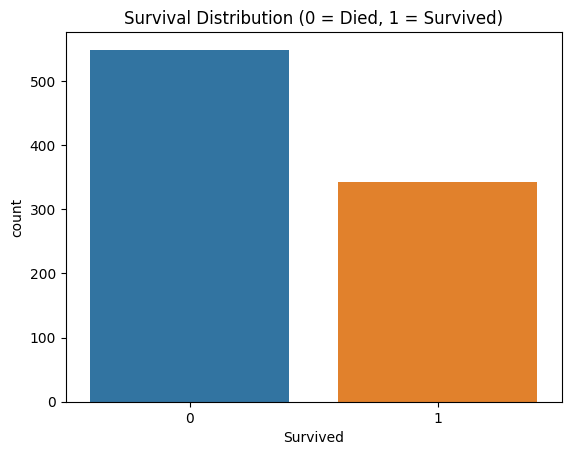

In [50]:
# Target Variable Distribution

# Number of passengers
passenger_counts = train.shape[0]
print("Number of passengers:")
print(passenger_counts)

# Survival distribution
survival_counts = train['Survived'].value_counts(normalize=True)
print("Survival rate:")
print(survival_counts)

# Bar plot
sns.countplot(data=train, x='Survived')
plt.title("Survival Distribution (0 = Died, 1 = Survived)")
plt.show()

In [51]:
# Missing Values Overview
missing = train.isnull().sum().sort_values(ascending=False)
print("Missing Values:")
print(missing[missing > 0])

Missing Values:
Cabin       687
Age         177
Embarked      2
dtype: int64


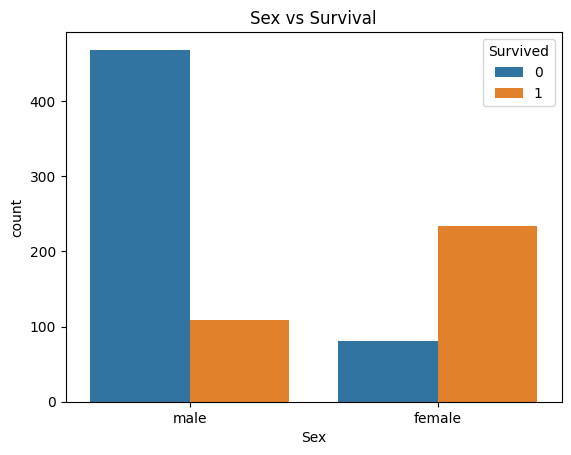

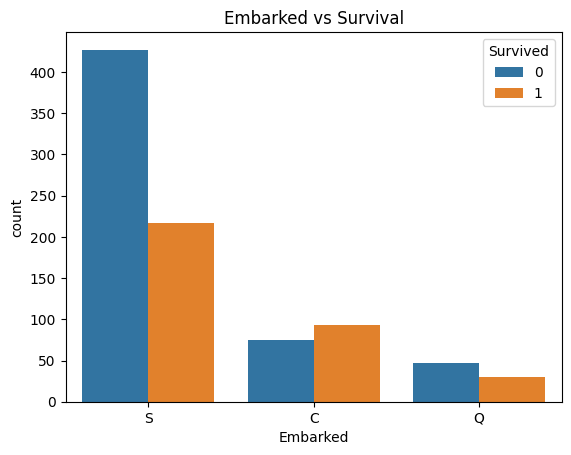

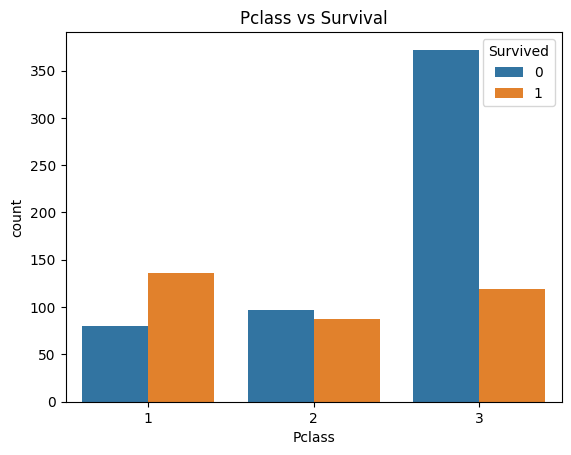

In [52]:
# Categorical Feature Distribution

# Sex distribution vs survival
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title("Sex vs Survival")
plt.show()

# Embarked distribution
sns.countplot(data=train, x='Embarked', hue='Survived')
plt.title("Embarked vs Survival")
plt.show()

# Pclass distribution
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.title("Pclass vs Survival")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


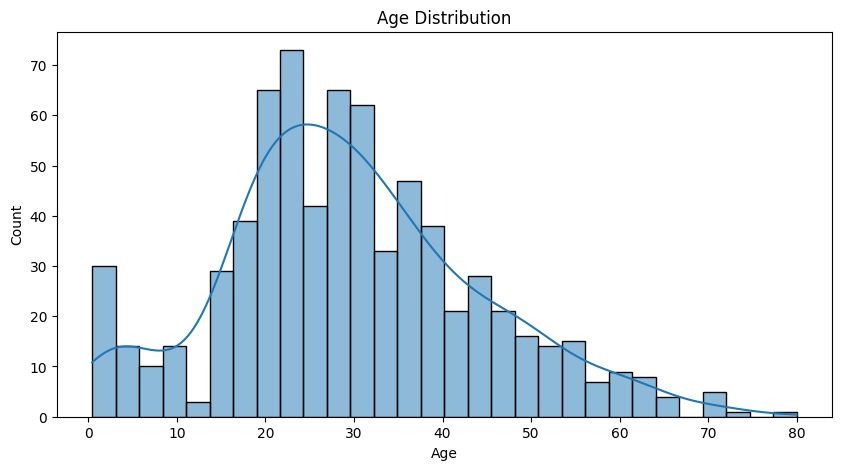

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


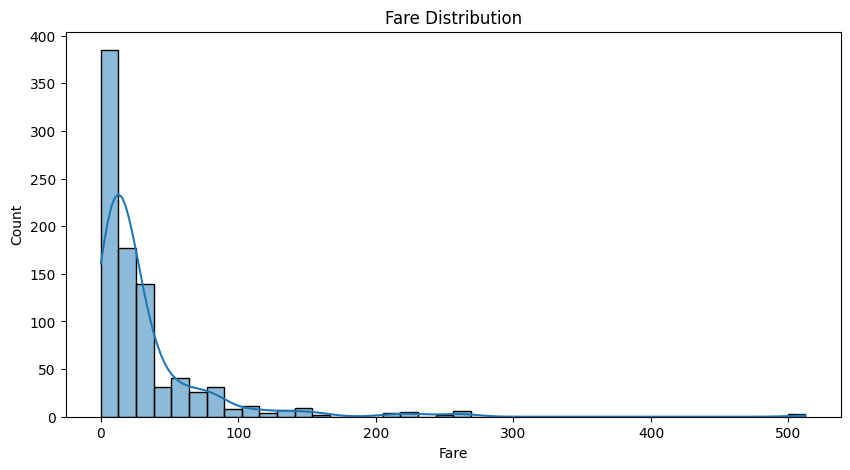

In [53]:
# Numerical Features Overview

# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
plt.figure(figsize=(10,5))
sns.histplot(data=train, x='Fare', bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()

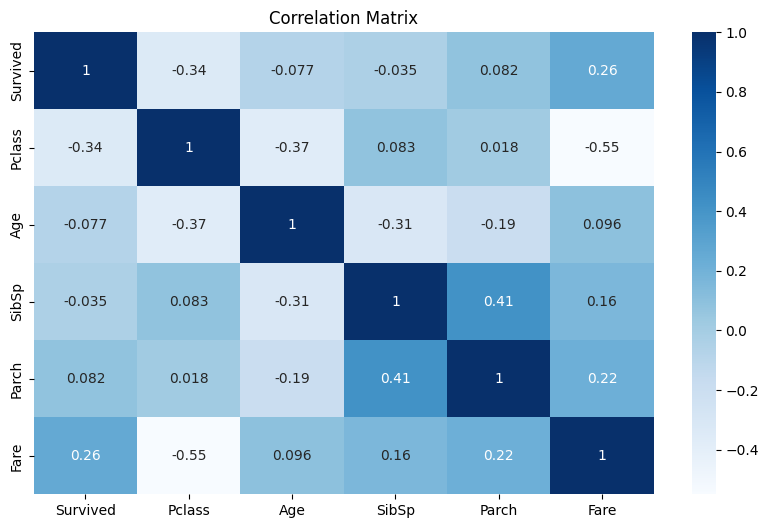

In [54]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()


### Data Cleaning

This step ensures the dataset is tidy and usable for model training. We’ll focus on handling missing values, transforming categorical features, and inspecting features if beneficial.

---

- **Missing Values:**
  - The Age column contains missing values and is filled with the median age.
  - The Cabin column has too many missing values and is dropped.
  - The Embarked column has a small number of missing values and is filled with the mode.
- **Encoding Categorical Variables:**
  - The Sex column is converted to 0 (male) and 1 (female).
  - The Embarked column is one-hot encoded.
- **Feature Selection:**
  - Irrelevant columns such as PassengerId, Name, and Ticket are removed as they do not contribute to prediction.
- **Validation:**
  - Checked for any remaining nulls or incorrect datatypes.
  - Verified shapes and types after preprocessing.

---

In [55]:
import pandas as pd

# Handle missing values
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})

# One-hot encode Embarked
embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked', drop_first=True)
train = pd.concat([train, embarked_dummies], axis=1)
train.drop(columns=['Embarked'], inplace=True)

# Drop irrelevant columns
train.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Check result
print(train.info())
print(train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB
None
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    1  22.0      1      0   7.2500       False        True
1         1       1    0  38.0      1      0  71.2833       False       False
2         1       3    0  26.0      0      0   7.9250       False        True
3         1       1    0  35.0      1      0  53.1000       False   

### Plan of Analysis Based on EDA

---

1. Split the data into training and validation sets.

2. Start simple with Logistic Regression (a linear baseline model):

3. Introduce a more powerful model: Random Forest Classifier:

4. Compare both models on validation performance (accuracy, precision, recall).

5. Tune hyperparameters of the better model (likely Random Forest).

6. Evaluate improvements from tuning.

7. Finalize the best-performing model for reporting.

---

## Step 3: Model Architecture

### Linear Regression 

---

Linear regression is traditionally used for regression tasks, it can be adapted for binary classification problems like Titanic survival prediction by using Logistic Regression, which is a special case of linear models. Logistic regression models the probability that a sample belongs to a class (Survived = 1 vs. Survived = 0) using a sigmoid function.

We start with logistic regression as a baseline model:

- It is simple, interpretable, and quick to train.
- It helps identify which features have positive or negative influence on the target outcome.
- It sets a reference point for more complex models like Random Forests.

---

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target
X = train.drop(columns=['Survived'])
y = train['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)

# Accuracy and report
logreg_acc = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_acc)
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [57]:
# Store the accuracy for comparison later:

model_results = []
model_results.append({'Model': 'Logistic Regression', 'Accuracy': logreg_acc})

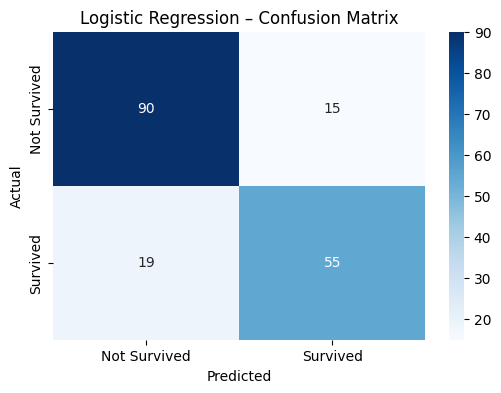

In [58]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression – Confusion Matrix')
plt.show()

### Random Forest

---

Random Forest is a powerful ensemble learning method that combines multiple decision trees. It is well-suited for classification tasks like Titanic survival prediction because:

- It captures non-linear relationships and interactions between features.
- It is robust to overfitting, especially with enough trees.
- It provides feature importance, which helps us understand which variables matter most.
- It can handle missing values and categorical variables more flexibly than linear models (although we already cleaned data).

---

In [59]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None,random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy and report
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [60]:
# Store the accuracy for comparison later:

model_results.append({'Model': 'Random Forest', 'Accuracy': rf_acc})

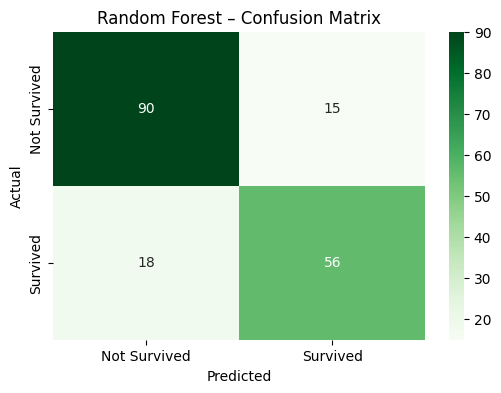

In [61]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest – Confusion Matrix')
plt.show()


### Model Performance Comparison

---

In this analysis, the Random Forest classifier slightly outperformed the Logistic Regression model in terms of accuracy on the test set. This improvement is expected because:
- Random Forest is an ensemble learning method that combines multiple decision trees
- enabling it to capture more complex, non-linear relationships in the data.

In contrast, Logistic Regression assumes a linear relationship between the input features and the target variable, which can limit its flexibility in modeling real-world datasets with intricate patterns. Therefore, Random Forest’s ability to model feature interactions and handle non-linearities likely contributed to its better predictive performance in this Titanic survival prediction task.

---

### Parameter Tuning for Random Forest

---

To improve the performance of the Random Forest classifier, we perform hyperparameter tuning using grid search with cross-validation. This process systematically tests:
- combinations of key parameters such as the number of trees (n_estimators)
- maximum tree depth (max_depth)
- minimum samples required to split a node (min_samples_split)

The goal is to identify the parameter set that yields the best accuracy on validation data, ensuring better generalization and avoiding overfitting. After finding the optimal parameters, we retrain the Random Forest model using these settings and evaluate its performance on the test set for comparison with previous models.

---

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
    'n_estimators': [150, 200, 250],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Retrieve best model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Evaluate
y_pred_rf_best = rf_best.predict(X_test)
rf_best_acc = accuracy_score(y_test, y_pred_rf_best)

print("Tuned Random Forest Accuracy:", rf_best_acc)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Random Forest Accuracy: 0.8156424581005587


In [63]:
# Store the accuracy for comparison later:

model_results.append({'Model': 'Tuned Random Forest', 'Accuracy': rf_best_acc})

## Step 4: Results and Analysis

---

### Results

#### Reasoning of why something worked well or why it didn’t:
- Logistic Regression provided a strong baseline performance. This is expected because the Titanic dataset has structured, tabular data and several categorical features that logistic regression can handle reasonably well.

- Random Forest showed a slight improvement over logistic regression, as it is capable of capturing more complex feature interactions and does not assume linearity or feature independence.

- Hyperparameter tuning of the Random Forest did not further improve accuracy. This outcome is common in relatively small or simple datasets, where increasing model complexity or varying hyperparameters does not significantly impact performance. It suggests the model had already reached a performance plateau.

#### Description of troubleshooting steps:
After noticing that both the basic and tuned Random Forest models yielded the same accuracy, we:

- Manually tested a range of n_estimators, max_depth, and min_samples_split to explore whether a better combination existed.

- Verified data preprocessing steps (e.g., encoding, scaling, missing values) were consistent.

- Compared performance using both automatic tuning (GridSearchCV) and manual hand-tuning.

Ultimately, even with hand-tuning, the improvement was marginal — reinforcing that the feature space might be saturated in terms of what these models can extract.

#### Hyperparameter optimization procedure summary:
We used GridSearchCV with a 5-fold cross-validation to tune three key parameters:
- n_estimators: Number of trees in the forest
- max_depth: Maximum depth of each tree
- min_samples_split: Minimum number of samples required to split a node

The best parameters selected were applied to train a new model (rf_best). However, the performance matched the basic Random Forest, indicating that default settings were already near-optimal.

---

### Analysis

The slight gain in accuracy from logistic regression to random forest confirms that nonlinear models have advantages in this problem — but not dramatically so.

The plateau in performance from tuning indicates that model selection is only part of the story. For meaningful improvement, feature engineering or additional data may be needed.

Our results demonstrate that while more advanced models often provide better results, complexity should always be justified by measurable gains.

---

In [64]:
import pandas as pd
from IPython.display import display
import warnings

# Suppress warnings just during display
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Convert and format
    results_df = pd.DataFrame(model_results)
    results_df['Accuracy (%)'] = (results_df['Accuracy'] * 100).round(2)
    results_df = results_df[['Model', 'Accuracy (%)']]
    
    display(results_df)


,Model,Accuracy (%)
0,Logistic Regression,81.01
1,Random Forest,81.56
2,Tuned Random Forest,81.56


## Step 5: Conclusion

#### Basic reiteration of results:
Logistic regression achieved about 81.0% accuracy, while random forest performed slightly better at 81.5%. Hyperparameter tuning for random forest did not lead to meaningful improvements.

#### Discussion of learning and takeaways:
This project reinforced the importance of data cleaning, feature encoding, and model comparison. Random forests can capture complex patterns better than linear models, but sometimes default parameters work well enough.

#### Discussion of why something didn’t work:
Limited feature complexity and dataset size likely constrained model improvements. The tuning range may not have covered more impactful parameters.

#### Suggestions for ways to improve:
Future work could focus on better feature engineering, trying other advanced models, and using ensemble or cross-validation techniques to improve accuracy.

In [65]:
import pandas as pd

test = pd.read_csv('/kaggle/input/titanic/test.csv')  

In [66]:
test_passenger_ids = test['PassengerId'].copy()

if 'Age' in test.columns:
    test['Age'] = test['Age'].fillna(test['Age'].median())

if 'Fare' in test.columns:
    test['Fare'] = test['Fare'].fillna(test['Fare'].median())

if 'Embarked' in test.columns:
    test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

if 'Embarked' in test.columns:
    embarked_dummies = pd.get_dummies(test['Embarked'], prefix='Embarked')
    test = test.drop(columns=['Embarked'])
    test = pd.concat([test, embarked_dummies], axis=1)

test = test.drop(columns=['PassengerId', 'Name', 'Ticket'], errors='ignore')

for col in X_train.columns:
    if col not in test.columns:
        test[col] = 0

test = test[X_train.columns]

X_test_scaled = scaler.transform(test)

y_test_pred = logreg.predict(X_test_scaled)

submission = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': y_test_pred
})

submission.to_csv('submission.csv', index=False)
print("Submission saved!")


Submission saved!
